In [11]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
n_task_per_file = 50
n_files = 10
base_dir = "proportional/toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [13]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [14]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,0.428571,1.000000,0.571429,1.000000,0.833333,1.000000
1,0.833333,0.833333,0.666667,1.000000,0.833333,1.000000
2,0.833333,1.000000,0.833333,0.833333,0.833333,0.833333
3,1.000000,0.666667,0.833333,0.500000,1.000000,0.833333
4,0.600000,1.000000,1.000000,1.000000,0.800000,0.600000
...,...,...,...,...,...,...
45,1.000000,1.000000,0.666667,0.666667,1.000000,0.833333
46,0.666667,1.000000,0.666667,1.000000,0.833333,1.000000
47,0.666667,0.800000,0.666667,0.833333,0.833333,0.833333
48,1.000000,0.857143,1.000000,1.000000,1.000000,0.833333


In [15]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,5.403805,4.113759,3.064227,2.464403,2.184120,2.052144
1,5.665588,3.899943,2.899463,2.405008,2.183284,2.080876
2,4.896690,3.876109,2.862696,2.432740,2.202562,2.027991
3,4.402128,3.871441,2.842601,2.461142,2.193060,2.068235
4,3.862746,3.521495,2.605867,2.237319,1.998222,1.920524
...,...,...,...,...,...,...
45,5.692887,3.949846,2.839827,2.426484,2.183357,1.996234
46,5.206817,3.895637,2.895126,2.444086,2.157025,2.067947
47,4.372454,3.505306,2.850119,2.466128,2.165672,2.040015
48,4.631427,4.194424,2.856983,2.438801,2.179845,2.018781


In [16]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [17]:
MSE_df.mean()

1.0       4.716243
UV_0.1    4.741196
UV_0.2    4.790395
UV_0.3    4.829372
UV_0.4    4.920509
UV_0.5    4.926178
dtype: float64

In [18]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)     0.822448
UV(0.1)    0.897848
UV(0.2)    0.898933
UV(0.3)    0.898838
UV(0.4)    0.898295
UV(0.5)    0.900829
dtype: float64
Length :
 RRT(1)     4.948301
UV(0.1)    3.882192
UV(0.2)    2.867376
UV(0.3)    2.438075
UV(0.4)    2.191326
UV(0.5)    2.027885
dtype: float64
MSE :
 RRT(1)     4.716243
UV(0.1)    4.741196
UV(0.2)    4.790395
UV(0.3)    4.829372
UV(0.4)    4.920509
UV(0.5)    4.926178
dtype: float64


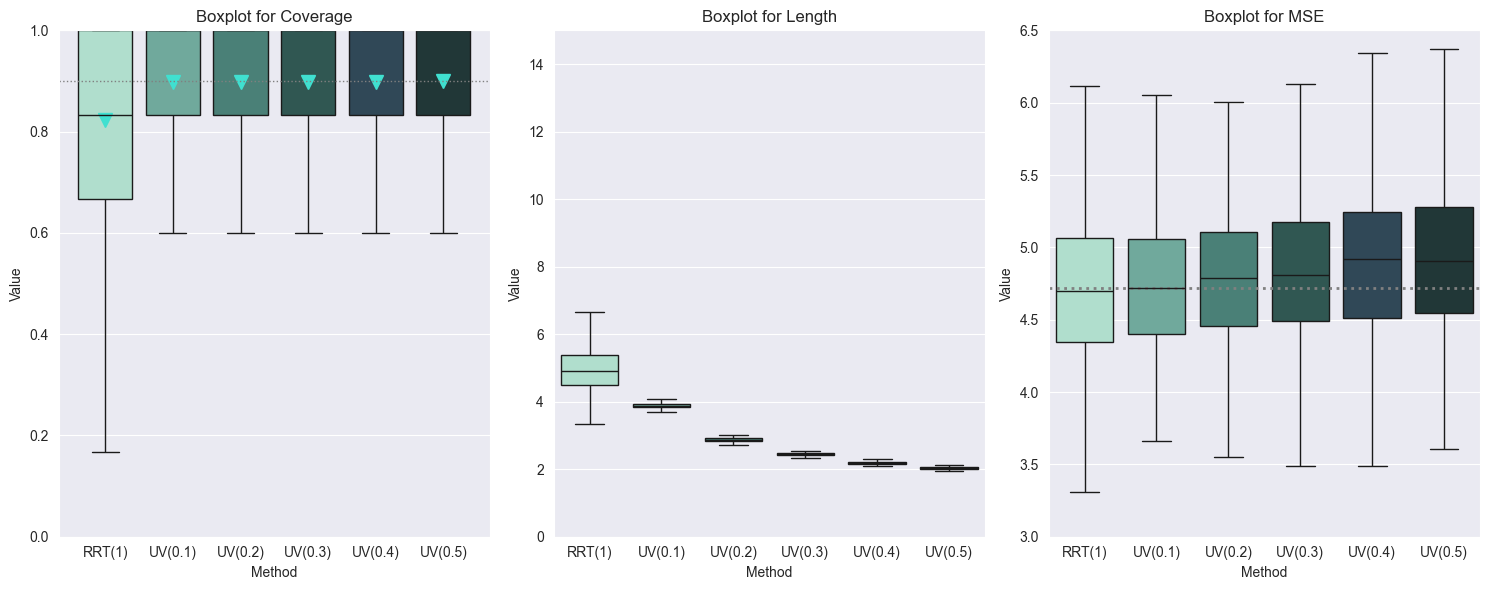

In [19]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])